nrows, ncols :  269 337
image size , filter size  337 269 3 3
image size , filter size  337 269 3 3
size of arr:  (337, 269)


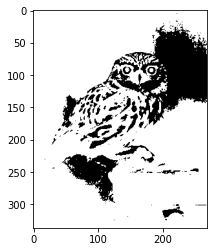

In [ ]:
from PIL import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def main():
    
    img = readPILimg()

    arr = PIL2np(img)
    im_out = gradients(arr)
    im_out = threshold(arr, 100, 2, 30)
    #im_out = smoothing(arr)
    
    #im_out = sharpening(arr)
    imout my space okay yaoaskdj
    tekrar yapıyıruz 
    ıtammamdrı

    
    new_img = np2PIL(im_out)
    #new_img.show()
    imgplot = plt.imshow(new_img, cmap = plt.cm.binary)

    #imgplot = plt.imshow(im_out)
def gradients(im):      # computes the magnitude of gradients in x and y direction, thresholds it to eliminate weak gradients
    # Gradient operators
    filter_x = np.array([[-1, 0, 1 ], [-1, 0, 1 ], [-1, 0, 1]])
    filter_y = np.array([[-1, -1, -1 ], [0, 0, 0 ], [1, 1, 1]])
    im_out_x = convolve(im,filter_x)
    im_out_y = convolve(im,filter_y)
    im_out = np.abs(im_out_x + im_out_y)     #instead of np.sqrt(im_out_x ** 2+ im_out_y **2), for simplicity
    im_out = threshold(im_out, 60, 0,100)
    return im_out

def smoothing(im):      # smooths an image by convolving with an averaging filter
    # Averaging
    filter_avg3 = np.array([[1, 1, 1 ], [1, 1, 1 ], [1, 1, 1]]) / 9.0
    filter_avg5 = np.array([[1, 1, 1,1,1 ], [1, 1, 1,1,1 ], [1, 1, 1,1,1 ], [1, 1, 1,1,1 ],[1, 1, 1,1,1 ]]) / 25.0
    im_out= convolve(im,filter_avg3)
    return im_out

def sharpening(im):     #sharpens an image by adding the difference between image and smoothed image to the original image
    # Sharpening
    filter_avg3 = np.array([[1, 1, 1 ], [1, 1, 1 ], [1, 1, 1]]) / 9.0
    im_out = convolve(im,filter_avg3)
    im_out_sharp = im + 3 * (im - im_out)
    im_out =  trim(im_out_sharp,0, 0, 255, 255)
    return im_out

def readPILimg():       # reads an image file and converts to gray level image
    img = Image.open('bird.png')
    img.show()
    img_gray = color2gray(img)
    img_gray.show()
    #img_gray.save('/Users/gokmen/Dropbox/vision-python/images/brick-house-gs','png')
    #new_img = img.resize((256,256))
    #new_img.show()
    return img_gray

def color2gray(img):    #converts a color image to a gray level image
    img_gray = img.convert('L')
    return img_gray

def PIL2np(img):        #converts a PIL image to a numpy array
    nrows = img.size[0]
    ncols = img.size[1]
    print("nrows, ncols : ", nrows,ncols)
    imgarray = np.array(img.convert("L"))
    return imgarray

def np2PIL(im):         #converts  a numpy array to PIL image
    print("size of arr: ",im.shape)
    img = Image.fromarray(np.uint8(im))
    return img

def convolve(im,filter): #convolve image im with filter
    (nrows, ncols) = im.shape
    (k1,k2) = filter.shape
    k1h = int((k1 -1) / 2)
    k2h = int((k2 -1) / 2)
    im_out = np.zeros(shape = im.shape)
    print("image size , filter size ", nrows, ncols, k1, k2)
    for i in range(k1h, nrows - k1h):
        for j in range(k2h, ncols - k2h):
            sum = 0.
            for l in range(-k1h, k1h + 1):
                for m in range(-k2h, k2h + 1 ):
                    sum += im[i - l][j - m] * filter[l + k1h][m + k2h]
            im_out[i][j] = sum
    return im_out

def threshold(im,T, LOW, HIGH): # thresholds the image: if abs(im) < T ? LOW : HIGH
    (nrows, ncols) = im.shape
    for i in range(nrows):
        for j in range(ncols):
            if abs(im[i][j]) <  T :
                im[i][j] = LOW
            else:
                im[i][j] = HIGH
    return im

def trim(im,T1, LOW, T2, HIGH):  # trims an image: if im < T1? LOW, and im >=T2 ? HIGH
    (nrows, ncols) = im.shape
    for i in range(nrows):
        for j in range(ncols):
            if im[i][j] <  T1 :
                im[i][j] = LOW
            if im[i][j] >=  T2 :
                im[i][j] = HIGH
    return im
if __name__=='__main__':
    main()